<a href="https://colab.research.google.com/github/me-smishra27/Telecom_Churn_Analysis/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

This project asks us to predict the key factors responsible for customer churn given past customers data.This Notebook explores and analyses this dataset to relate the different factors to the churn. It can also serve as a great starting point for learning how to explore, manipulate, transform and predict from data .


**Problem of Churning in Industry:**

*All industries suffer from voluntary churn -- the loss of customers to some other company. The survival of any business is based on its ability to retain customers. This is particularly true for Telecom companies.*

*Telecom companies today measure voluntary churn by a monthly figure, such as 1.9 percent or 2.1 percent. This is the average number of customers who quit their service per month. Annual churn rates for telecommunications companies average between 10 percent and 67 percent.*

*Our experiment can help understand what could be the reason for the churning of such customers by feature selection and data analysis.*

**This Notebook has the following sections:-**

**A Date with Data:** to know someone better you must meet him/her in person. In this section we will go on a date with data to explore and visualize it to gain insights.

**Experiencing the Change:** As you and data fall in love, data experiences positive changes. In this section data is cleaned and pre-processed (which is a positive change) for accurate prediction.

**Exploring the Unknowns:** As the relationship between you and data goes on, you tend to explore and dig into what suits data the most. 


**IMPORTING THE PYTHON LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

%matplotlib inline

**IMPORTING THE DATA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath='/content/drive/MyDrive/Colab Notebooks/Cohort_Himalaya_AlmaBetter/Python_For_DataScience/Capstone_Telecom_Churn_Analysis/Telecom Churn.csv'
churn_data=pd.read_csv(filepath)

#Date with Data

As the Experts always Say : Always Know your Data
I wouldn't say that knowing your data is the most difficult thing in data science, but it is time-consuming. Therefore, it's easy to overlook this initial step and jump too soon into the water. So I tried to learn how to swim before jumping into the water


In this section we will go on a date 'Data'. We will explore the data thoroughly , what its like, how it is distributed , what is the target , what affects the targets most ,etc

In [ ]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
churn_data.head()

State  Account length  ...  Customer service calls  Churn
0    KS             128  ...                       1  False
1    OH             107  ...                       1  False
2    NJ             137  ...                       0  False
3    OH              84  ...                       2  False
4    OK              75  ...                       3  False

[5 rows x 20 columns]

In [ ]:
churn_data.tail()

State  Account length  ...  Customer service calls  Churn
3328    AZ             192  ...                       2  False
3329    WV              68  ...                       3  False
3330    RI              28  ...                       2  False
3331    CT             184  ...                       2  False
3332    TN              74  ...                       0  False

[5 rows x 20 columns]

In [ ]:
churn_data.shape

(3333, 20)

In [ ]:
len(churn_data['State'].unique())

51

In [ ]:
churn_data['Number vmail messages'].unique().max()

51

The churn data provided for this assignment is in csv format. We have imported the data as a data frame object and the above lines of code show us the initial look of data.

**So What can we Expect ?**

There are 3333 unique customer belonging to different states in the data set.

**Data Description:**

**STATE:** 51 Unique States

**Account Length:** total days for which account is active

**Area Code:** 415 for San Francisco, 408 for San Jose and 510 is for City of Okland

**International Plan:** Opted for International Plan subscription **"Yes" / "No"** 

**Voice Mail Plan:** Opted for Voice Mail Plan subscription **"Yes" / "No"** 

**Number vmail messages:** Number of Voice Mail Messages ranging from 0 to 51

**Total day minutes:** Total Number of Minutes Spent By Customer in day time.

**Total day calls:** Total Number of Calls made by Customer in day time.

**Total day charge:** Total Charge to the Customer in dat time.

**Total eve minutes:** Total Number of Minutes Spent By Customer in Evening

**Total eve calls:** Total Number of Calls made by Customer in Evening.

**Total eve charge:** Total Charge to the Customers in Morning.

**Total night minutes:** Total Number of Minutes spent By Customer in the Night.

**Total night calls:** Total Number of Calls made by Customer in Night.

**Total night charge:** Total Charge to the Customers in Night.

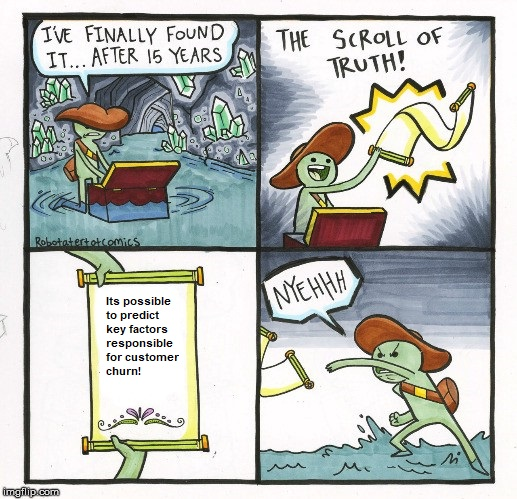

#Sanity check is performed on the data set to check for all the null/Nan values. The data does not contain any null values and hence analysis is performed with the same data set.

***INITIAL BRAIN STORMING ON DATA SET***


1.   What is the rate of churn as per the given data?
2.   Are the churners uniformly distributed over all the states or some states have higher rates than other?
3.   Are the churners uniformly distributed over all the are codes ?
4.   Correation between Churners and other features ?


In [ ]:
churning_rate = (tele_df[tele_df['Churn']==True]['Churn'].count()/tele_df['Churn'].count())*100
print('The rate of churning is',round(churning_rate,2),'%')


The rate of churning is 14.49 %


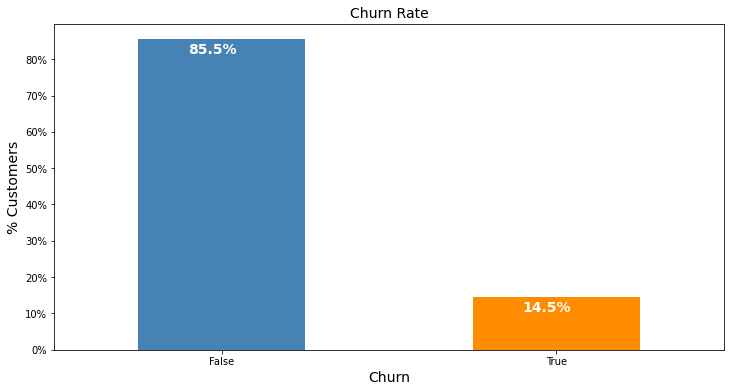

In [ ]:
colors = ['steelblue','darkorange']
churn_per = (tele_df['Churn'].value_counts()*100.0 /len(tele_df)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (12,6))

churn_per.set_ylabel('% Customers',size = 14)
churn_per.set_xlabel('Churn',size = 14)
churn_per.set_title('Churn Rate', size = 14)
churn_per.yaxis.set_major_formatter(mtick.PercentFormatter())

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in churn_per.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in churn_per.patches:
# get_width pulls left or right; get_y pushes up or down
    churn_per.text(i.get_x()+.15, i.get_height()-4.0, \
                str(round((i.get_height()/total), 1))+'%',
                fontsize=12,
                color='white',
              weight = 'bold',
              size = 14)



##   Churn is a one of the biggest problem in the telecom industry. Research has shown that the average yearly churn rate among the top 4 telecom companies in the US is 21%. 

##  14.5% is actually quite bad for a company; such a churn rate can make the company go bankrupt.



# Find state wise churn distribution , plot bar graph corresponding to it.


In [ ]:
tdf1=tele_df[tele_df['Churn']==True].groupby(['State','Churn'],as_index=False).Churn.count()

In [ ]:
tdf1['total_count']=tele_df.groupby('State').State.transform('count')

In [ ]:
tdf1['Churn_per']=tdf1['Churn']/tdf1['total_count']*100

In [ ]:
tdf1.set_index('State',inplace=True)

* Narrowing down our scope and identifying critical states with maximum churn rate.  
* Study has been conducted on top 35 states which contributes 80% of the churners




Churn    83.022774
dtype: float64


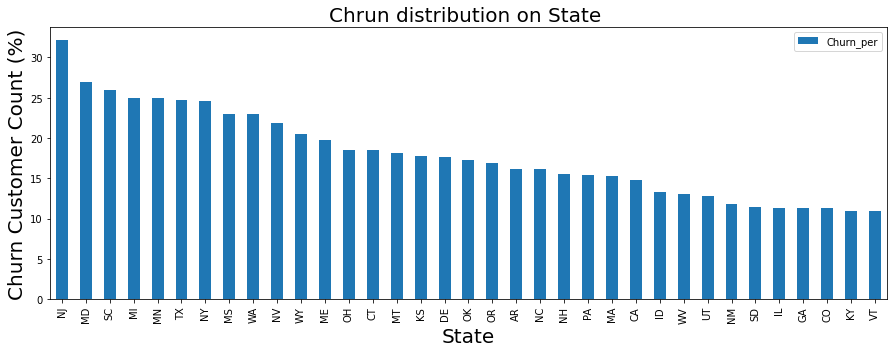

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)
# plt.plot(df1.nlargest(51,'Churn'))

tdf1[['Churn_per']].nlargest(35,'Churn_per').plot(kind='bar')
plt.title('Chrun distribution on State ', fontsize=20)
plt.xlabel('State',fontsize=20)
plt.ylabel('Churn Customer Count (%)',fontsize=20)

total_sum = tdf1[['Churn']].nlargest(35,'Churn').sum()
percent = total_sum/tdf1['Churn'].sum()*100
print(percent)

Text(0.5, 1.0, 'Correlation with Churn')

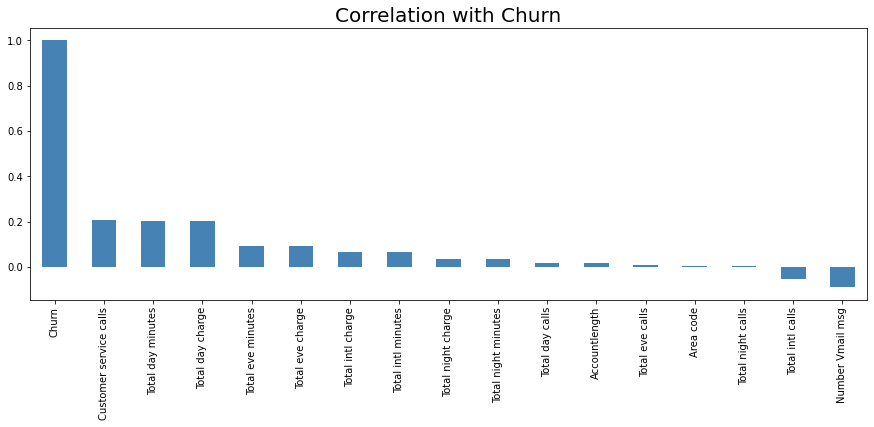

In [ ]:
plt.figure(figsize=(15,5))

fig=tele_df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar', color = 'steelblue')
fig.set_xticklabels(['Churn', 'Customer service calls','Total day minutes','Total day charge','Total eve minutes',
                     'Total eve charge','Total intl charge','Total intl minutes','Total night charge','Total night minutes',
                     'Total day calls','Accountlength','Total eve calls','Area code','Total night calls','Total intl calls','Number Vmail msg'])
fig.set_title('Correlation with Churn',FontSize='20')

In [ ]:
df12=tele_df[tele_df['Churn']==True]
# df12.corr()['Churn'].sort_values(ascending = False).plot(kind='bar', color = 'midnightblue')
df12.shape

(483, 20)

# Charge per minute of Churn and non  Churn Customer

In [ ]:
tele_df['charge_per_min_day'] =tele_df['Total day charge']/tele_df['Total day minutes']
tele_df['charge_per_min_eve'] =tele_df['Total eve charge']/tele_df['Total eve minutes']
tele_df['charge_per_min_night'] =tele_df['Total night charge']/tele_df['Total night minutes']

In [ ]:
# For non churn customer
chrg_p_min_day_mean = tele_df[tele_df['Churn']==False]['charge_per_min_day'].mean()
chrg_p_min_eve_mean = tele_df[tele_df['Churn']==False]['charge_per_min_eve'].mean()
chrg_p_min_night_mean = tele_df[tele_df['Churn']==False]['charge_per_min_night'].mean()
print(chrg_p_min_day_mean,chrg_p_min_eve_mean,chrg_p_min_night_mean)

0.17000331531507384 0.08500123332733626 0.0450003662063208


In [ ]:
#For Churn customer
chrg_p_min_day_mean = tele_df[tele_df['Churn']==True]['charge_per_min_day'].mean()
chrg_p_min_eve_mean = tele_df[tele_df['Churn']==True]['charge_per_min_eve'].mean()
chrg_p_min_night_mean = tele_df[tele_df['Churn']==True]['charge_per_min_night'].mean()
print(chrg_p_min_day_mean,chrg_p_min_eve_mean,chrg_p_min_night_mean)

0.17000275572453427 0.08500081707432333 0.0450002247152355


**There is no difference between charge per minute for churn and non churn customer**

Text(0.5, 0, 'Account Length')

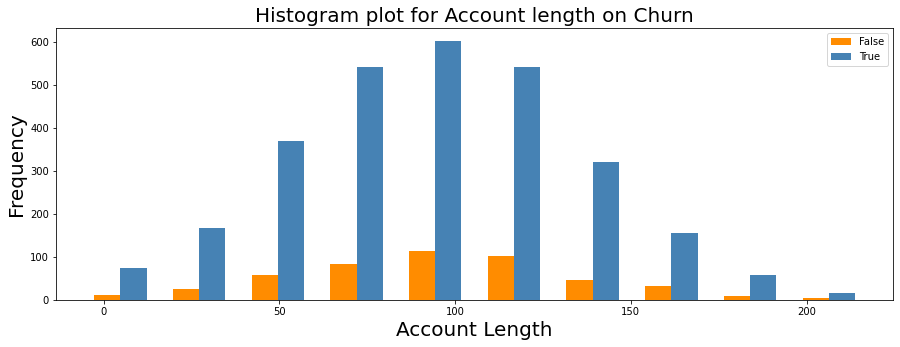

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)

fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(tele_df1[tele_df1['Churn']==True]['acc_length'])
b_heights, b_bins = np.histogram(tele_df1[tele_df1['Churn']==False]['acc_length'], bins=a_bins)

width = (a_bins[1] - a_bins[0])/3
ax.bar(a_bins[:-1], a_heights, width=width, facecolor='darkorange')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='steelblue')
ax.legend(labels=['False','True'])
plt.title('Histogram plot for Account length on Churn',fontsize='20')
plt.ylabel('Frequency',fontsize=20)
plt.xlabel('Account Length',fontsize=20)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 1080x360 with 0 Axes>

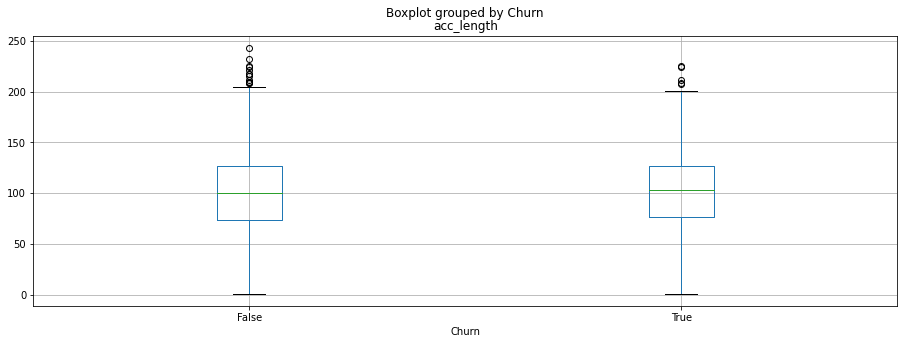

In [ ]:
plt.figure(figsize=(15,5))
fig=tele_df1.boxplot(column='acc_length', by='Churn')


**We did not get any inference from the “Histogram” therefore we plotted “BOX plot” and we reached to a conclusion that median of account length was higher for Churners. This depicts that the customers with higher account length are leaving after experiencing poor services.
More focus should be done on longer account length customers as they might become the loyal customers if served properly.**


In [ ]:
tdf_CT=tele_df1[tele_df1['Churn']==True]

In [ ]:
tdf_CF=tele_df1[tele_df1['Churn']==False]

In [ ]:
tdf_CT.describe()

acc_length   area_code  ...  ttl_intl_chrg  cust_servc_calls
count  483.000000  483.000000  ...     483.000000        483.000000
mean   102.664596  437.817805  ...       2.889545          2.229814
std     39.467820   42.792270  ...       0.754152          1.853275
min      1.000000  408.000000  ...       0.540000          0.000000
25%     76.000000  408.000000  ...       2.380000          1.000000
50%    103.000000  415.000000  ...       2.860000          2.000000
75%    127.000000  510.000000  ...       3.460000          4.000000
max    225.000000  510.000000  ...       5.400000          9.000000

[8 rows x 16 columns]

In [ ]:
tdf_CF.describe()

acc_length    area_code  ...  ttl_intl_chrg  cust_servc_calls
count  2850.000000  2850.000000  ...    2850.000000       2850.000000
mean    100.793684   437.074737  ...       2.743404          1.449825
std      39.882350    42.306156  ...       0.751784          1.163883
min       1.000000   408.000000  ...       0.000000          0.000000
25%      73.000000   408.000000  ...       2.270000          1.000000
50%     100.000000   415.000000  ...       2.750000          1.000000
75%     127.000000   510.000000  ...       3.240000          2.000000
max     243.000000   510.000000  ...       5.100000          8.000000

[8 rows x 16 columns]

In [ ]:
#                   acc_length	area_code	  num_vmail_msg	  ttl_day_min	 ttl_day_calls	ttl_day_chrg	ttl_eve_min	  ttl_eve_calls	 ttl_eve_chrg	 ttl_nyt_min	ttl_nyt_calls	 ttl_nyt_chrg	 ttl_intl_min	 ttl_intl_calls	 ttl_intl_chrg	cust_servc_calls

# mean_churn False	100.793684	437.074737	8.604561	      175.175754	 100.283158	    29.780421	    199.043298	  100.038596	   16.918909	   200.133193	   100.058246	   9.006074	     10.158877	   4.532982	       2.743404	       1.449825

# mean_churn True 	102.664596	437.817805	5.115942	      206.914079	 101.335404	    35.175921	    212.410145	  100.561077	   18.054969	   205.231677	   100.399586	    9.235528	   10.70000	     4.163561	       2.889545	       2.229814


Observation from above data:-

2.they are making more day calls then other timeline (in number of calls)

3.their call duration for daytime is more as compare to other timeline (in minutes)

4.loyal customer prefer voice mail more than churning customer(when network is busy)

In [ ]:
# plt.hist(tdf1['ttl_eve_min'])
# plt.hist(tdf1['ttl_nyt_min'])
# plt.hist(tdf1[tdf1['Churn']==True]['acc_length'])
# plt.hist(tdf1[tdf1['Churn']==False]['acc_length'])
# plt.hist(tdf1[tdf1['Churn']==False]['ttl_day_min'])
# plt.hist(tdf1[tdf1['Churn']==False]['ttl_eve_min'])
# plt.hist(tdf1['ttl_day_min'])

In [ ]:
tdf_CT_VT=tdf_CT[tdf_CT['voice_mail_plan']=='Yes']
tdf_CT_VF=tdf_CT[tdf_CT['voice_mail_plan']=='No']

In [ ]:
tdf_CF_VF=tdf_CF[tdf_CF['voice_mail_plan']=='No']
tdf_CF_VT=tdf_CF[tdf_CF['voice_mail_plan']=='Yes']

In [ ]:
tdf_CF_VF.describe()

acc_length    area_code  ...  ttl_intl_chrg  cust_servc_calls
count  2008.000000  2008.000000  ...    2008.000000       2008.000000
mean    100.739044   437.228088  ...       2.745000          1.460657
std      40.186010    42.457831  ...       0.755368          1.154030
min       1.000000   408.000000  ...       0.000000          0.000000
25%      73.000000   408.000000  ...       2.270000          1.000000
50%     100.000000   415.000000  ...       2.750000          1.000000
75%     128.000000   510.000000  ...       3.240000          2.000000
max     243.000000   510.000000  ...       5.100000          7.000000

[8 rows x 16 columns]

In [ ]:
tdf_CF_VT.describe()

acc_length   area_code  ...  ttl_intl_chrg  cust_servc_calls
count  842.000000  842.000000  ...     842.000000        842.000000
mean   100.923990  436.709026  ...       2.739596          1.423990
std     39.172006   41.965074  ...       0.743602          1.187347
min      1.000000  408.000000  ...       0.000000          0.000000
25%     74.000000  415.000000  ...       2.240000          1.000000
50%    101.000000  415.000000  ...       2.750000          1.000000
75%    127.000000  415.000000  ...       3.240000          2.000000
max    221.000000  510.000000  ...       4.750000          8.000000

[8 rows x 16 columns]

In [ ]:
tdf_CT_VF.describe()

acc_length   area_code  ...  ttl_intl_chrg  cust_servc_calls
count  403.000000  403.000000  ...     403.000000        403.000000
mean   102.258065  437.071960  ...       2.865707          2.158809
std     40.442981   42.323526  ...       0.734194          1.813326
min      1.000000  408.000000  ...       0.540000          0.000000
25%     75.500000  415.000000  ...       2.380000          1.000000
50%    101.000000  415.000000  ...       2.840000          2.000000
75%    126.500000  462.500000  ...       3.380000          4.000000
max    225.000000  510.000000  ...       4.940000          9.000000

[8 rows x 16 columns]

In [ ]:
tdf_CT_VT.describe()

acc_length   area_code  ...  ttl_intl_chrg  cust_servc_calls
count   80.000000   80.000000  ...      80.000000         80.000000
mean   104.712500  441.575000  ...       3.009625          2.587500
std     34.289975   45.169099  ...       0.842378          2.016977
min     17.000000  408.000000  ...       1.110000          0.000000
25%     80.000000  408.000000  ...       2.417500          1.000000
50%    105.500000  415.000000  ...       3.000000          2.000000
75%    128.750000  510.000000  ...       3.685000          4.000000
max    188.000000  510.000000  ...       5.400000          9.000000

[8 rows x 16 columns]

In [ ]:
# for Churn false 
#                         acc_length	area_code	  num_vmail_msg	  ttl_day_min	 ttl_day_calls	ttl_day_chrg	ttl_eve_min	 ttl_eve_calls	ttl_eve_chrg	ttl_nyt_min	ttl_nyt_calls	ttl_nyt_chrg	ttl_intl_min	ttl_intl_calls	ttl_intl_chrg	cust_servc_calls
# vmail plan false --mean	100.739044	437.228088	0.0	            173.188147	 100.416335	    29.442555	    197.485707	 100.135956	    16.786489	    199.290737	99.884960	     8.968167	    10.164890	    4.547809	       2.745000	      1.460657
# vmail plan true  --mean	100.923990	436.709026	29.124703	      179.915796	 99.965558	    30.586164	    202.757838	 99.806413	    17.234703	    202.142280	100.471496	   9.096473	    10.144537	    4.497625	       2.739596	      1.423990

# for Churn true
# vmail plan false --mean	102.258065	437.071960	0.0	            212.934739	 101.354839	     36.199355	  214.351117	 100.481390	    18.219876	    207.613896	 100.091811	   9.342829	     10.611663	  4.069479        	2.865707	     2.158809
# vmail plan true  --mean	104.712500	441.575000	30.887500     	176.58500	   101.237500	     30.020375	  202.632500	 100.962500	    17.224250	    193.231250	 101.950000	   8.695000	     11.145000	  4.637500	        3.009625	     2.587500


## Area Code wise Customer(Churner and Non-Churner) Distribution

In [ ]:
tele_df1.head()

State  acc_length  area_code  ... ttl_intl_chrg cust_servc_calls  Churn
0    KS         128        415  ...          2.70                1  False
1    OH         107        415  ...          3.70                1  False
2    NJ         137        415  ...          3.29                0  False
3    OH          84        408  ...          1.78                2  False
4    OK          75        415  ...          2.73                3  False

[5 rows x 20 columns]

In [ ]:
state_list=tdf1.nlargest(35,'Churn_per').index.values.tolist()
new_df=tele_df1[tele_df1['State'].isin(state_list)]

In [ ]:
df4=pd.crosstab(new_df['Churn'], new_df['area_code'], margins = True)

In [ ]:
df4.loc['False_per']=df4.iloc[0,:]/df4.iloc[2,:]*100
df4.loc['True_per']=df4.iloc[1,:]/df4.iloc[2,:]*100
df5=df4.transpose()

In [ ]:
df4=pd.crosstab(new_df['Churn'], new_df['area_code'], margins = True)


Text(0, 0.5, 'Frequency')

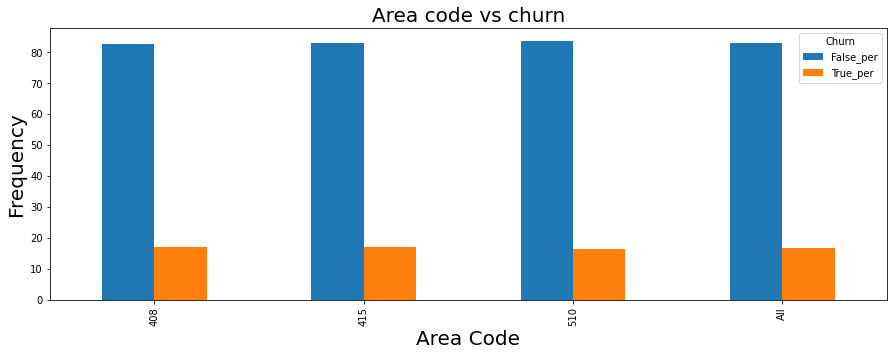

In [ ]:
df5.iloc[:,3:].plot(kind='bar')
plt.title('Area code vs churn',fontsize=20)
plt.xlabel('Area Code',fontsize=20)
plt.ylabel('Frequency',fontsize=20)

For top 10 state( churn population percentage in each state) area code 408 has more churning population than other area code


## International plan affecting the churn rate

In [ ]:
df6 = tele_df1.groupby(['Churn','intl_plan'])['intl_plan'].count()
df6.unstack()

# people having intl plan with false churning:

percent_false_intl = (df6.loc[False,'Yes']/df6.loc[False].sum())*100
print('The % of customers with false churning having intl plan is', round(percent_false_intl,2),'%')

# people having intl plan with true churning:

percent_true_intl  = (df6.loc[True,'Yes']/df6.loc[True].sum())*100
print('The % of customers with true churning having intl plan is',round(percent_true_intl,2),'%')


The % of customers with false churning having intl plan is 6.53 %
The % of customers with true churning having intl plan is 28.36 %


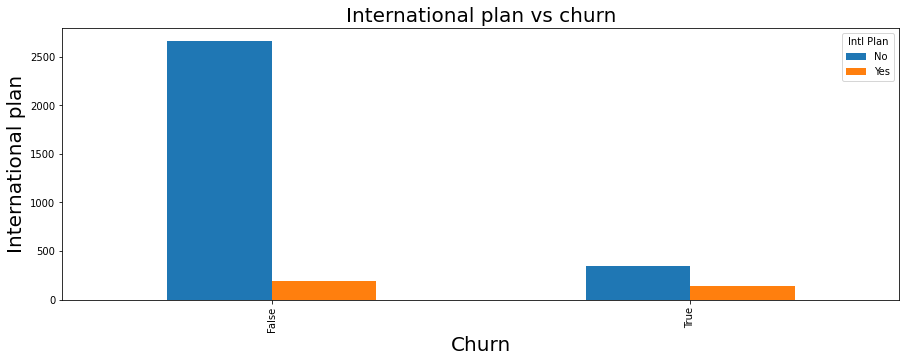

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)
df6.unstack().plot(kind='bar')
plt.title('International plan vs churn',fontsize=20)
plt.xlabel('Churn',fontsize=20)
plt.ylabel('International plan',fontsize=20)
plt.legend(title='Intl Plan')

*   Customer having international plan are more prone to churn.



## Voice mail plan affecting Churn rate

In [ ]:
df4 = new_df.groupby(['Churn', 'voice_mail_plan'])['voice_mail_plan'].count()
print(df4.unstack())
vmp_yes_true = (df4.unstack().loc[True,'Yes'] / df4.unstack().loc[True].sum())*100
print('The % of people with TRUE churning with voice plan activated', round(vmp_yes_true,2),'%')
vmp_yes_false = (df4.unstack().loc[False,'Yes'] / df4.unstack().loc[False].sum())*100
print('The % of people with FALSE churning with voice plan activated',round(vmp_yes_false,2),'%')


voice_mail_plan    No  Yes
Churn                     
False            1375  572
True              325   70
The % of people with TRUE churning with voice plan activated 17.72 %
The % of people with FALSE churning with voice plan activated 29.38 %


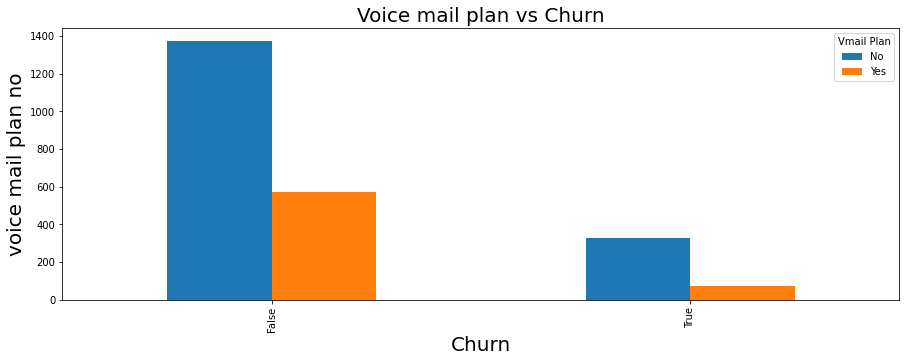

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)
df4.unstack().plot(kind='bar')
plt.title('Voice mail plan vs Churn',fontsize=20)
plt.xlabel('Churn',fontsize=20)
plt.ylabel('voice mail plan no',fontsize=20)
plt.legend(title='Vmail Plan')

* churning customer not having voice mail plan are more prone to leave.
voice mail plan are not affordable 

##Customer service calls affecting the Churn rate

In [ ]:
pd.crosstab(new_df['Churn'], new_df['cust_servc_calls'], margins = True)


cust_servc_calls    0    1    2    3    4   5   6  7  8  9   All
Churn                                                           
False             404  722  477  261   55  19   5  3  1  0  1947
True               80   97   73   33   61  32  13  3  1  2   395
All               484  819  550  294  116  51  18  6  2  2  2342

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Customer Service Calls'),
 Text(0.5, 1.0, 'Customer service calls vs Churn')]

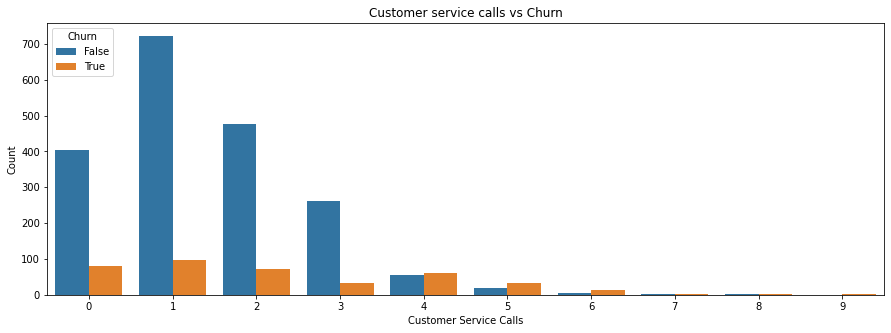

In [ ]:
fig = sns.countplot(x = 'cust_servc_calls', hue = 'Churn', data = new_df)
fig.set(xlabel='Customer Service Calls',ylabel='Count',title='Customer service calls vs Churn')
fig.set_title('')

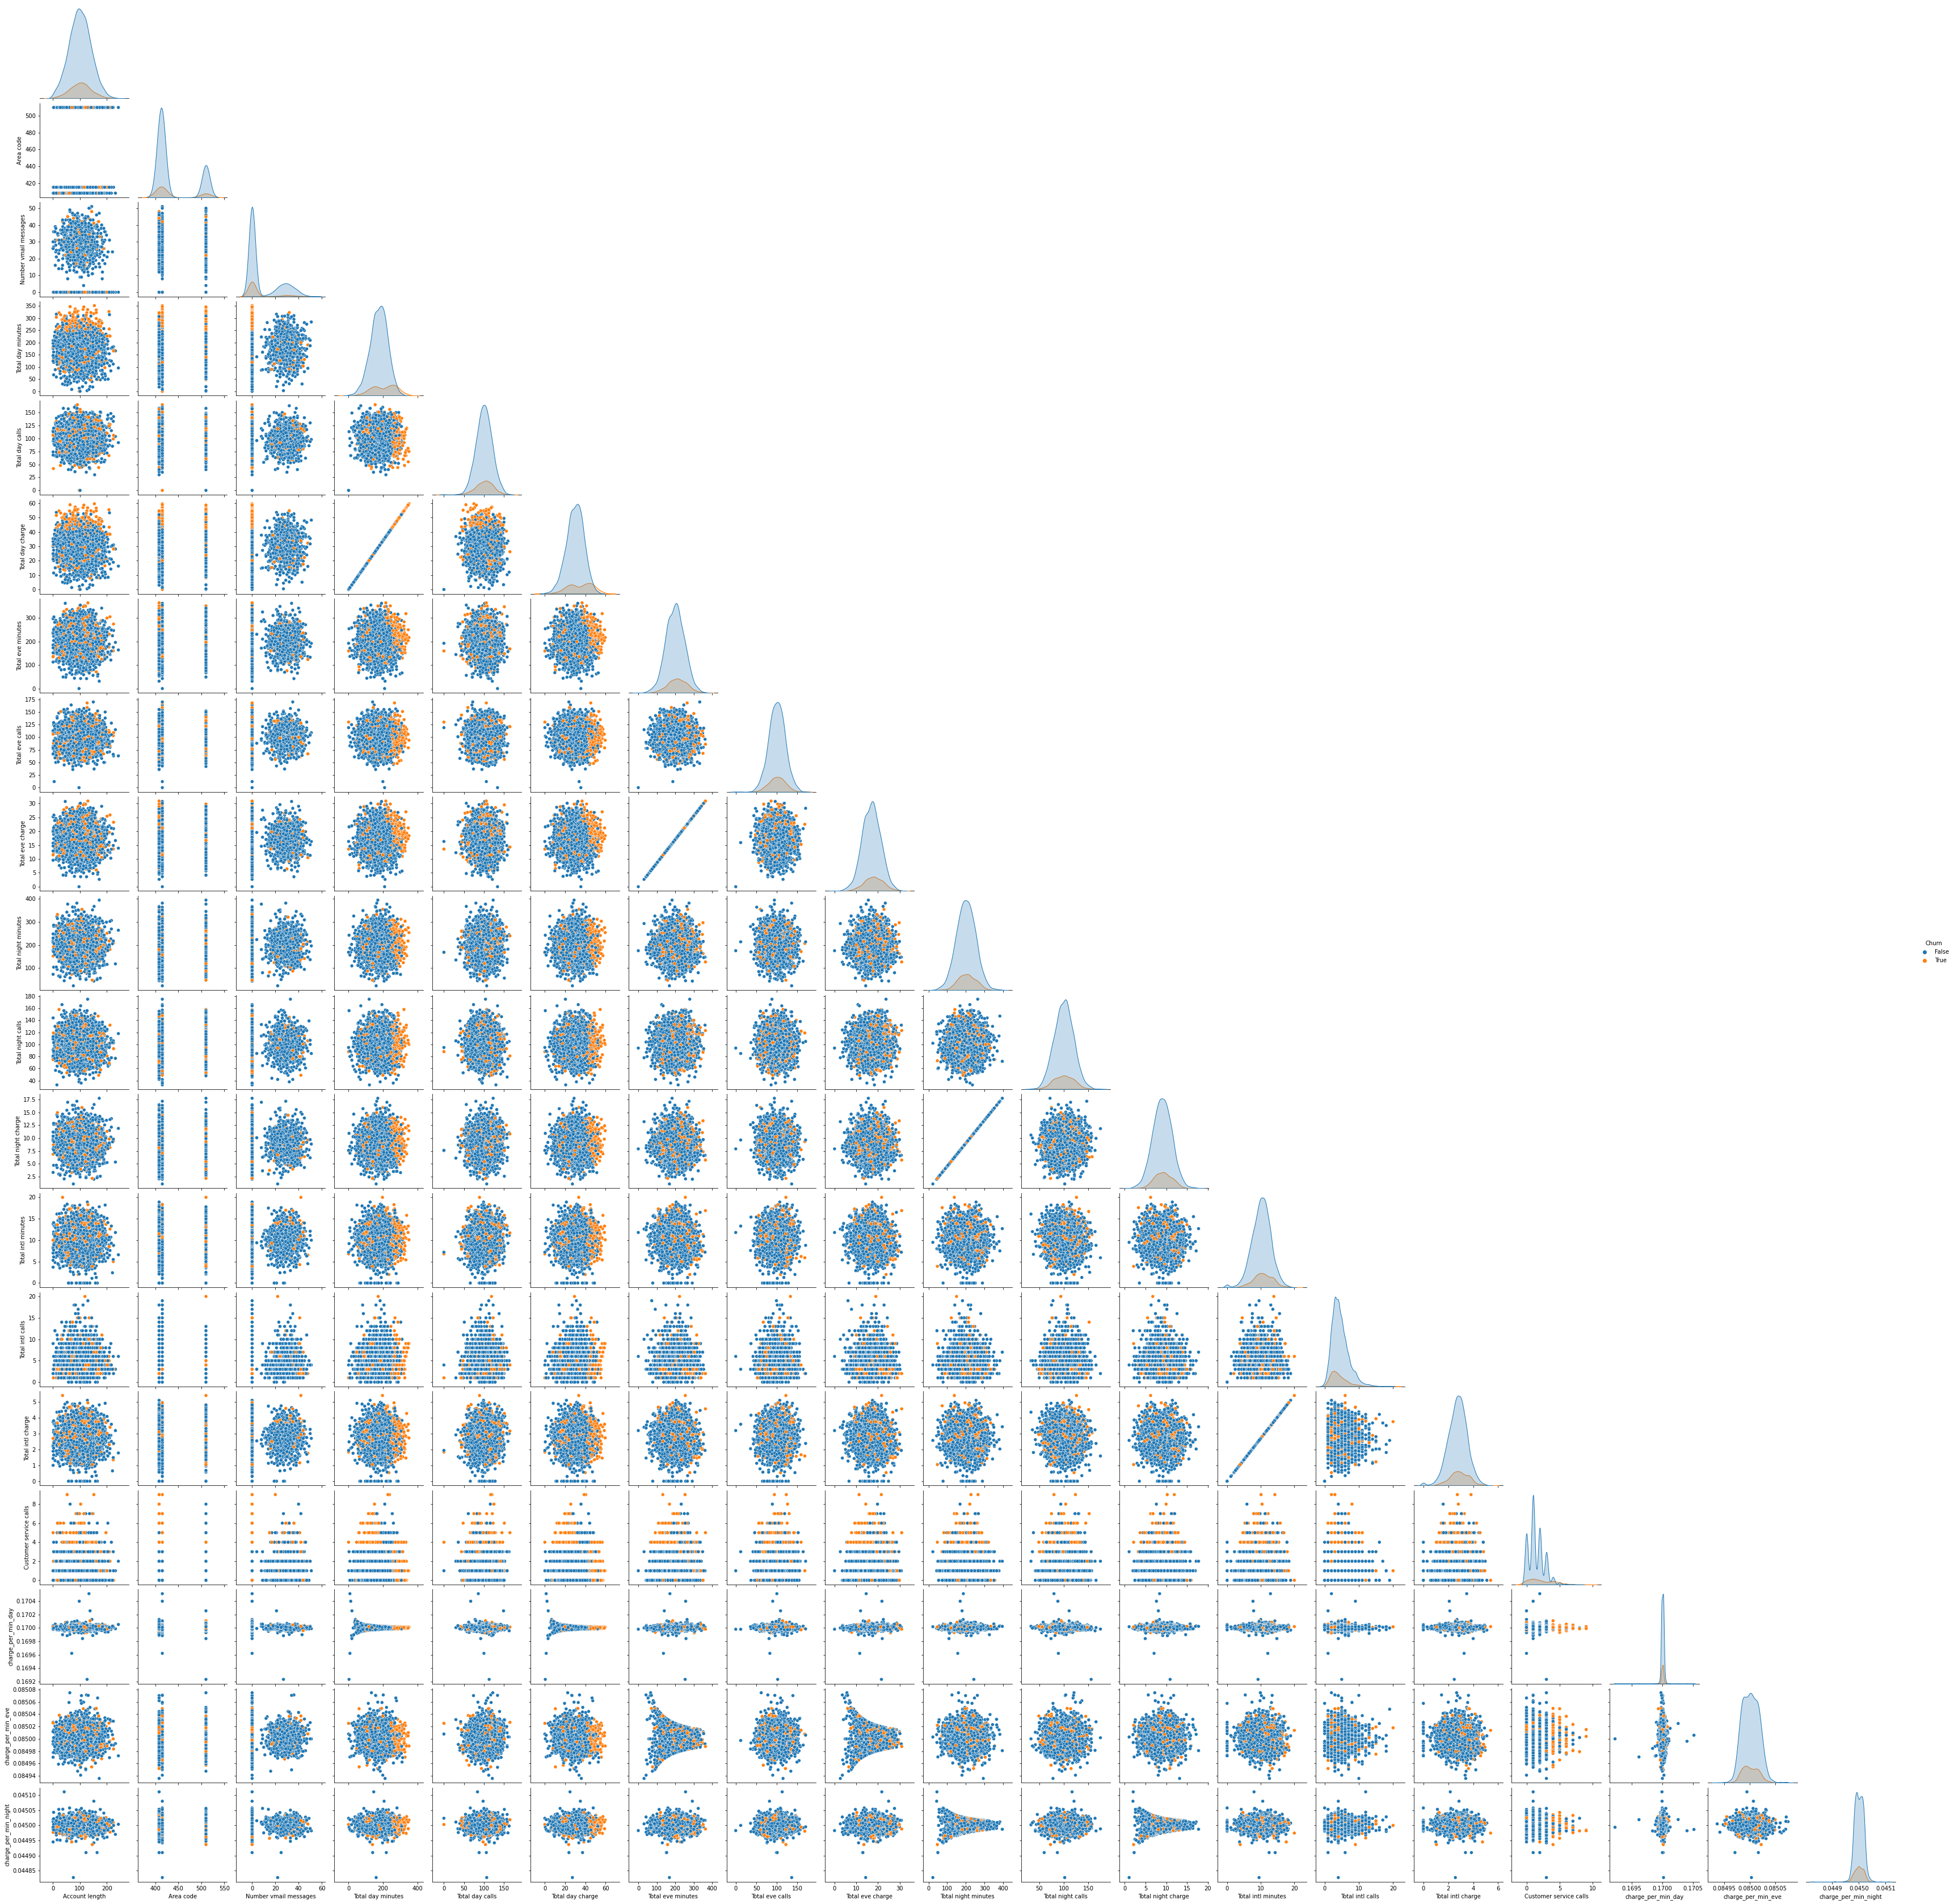

In [ ]:
fig = sns.pairplot(tele_df,hue='Churn',corner=True)


In [ ]:
new_df['Service_calls'] = (new_df['cust_servc_calls'] > 3).astype('int')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
pd.crosstab(new_df['Service_calls'], new_df['Churn'], margins = True)


Churn          False  True   All
Service_calls                   
0               1864   283  2147
1                 83   112   195
All             1947   395  2342

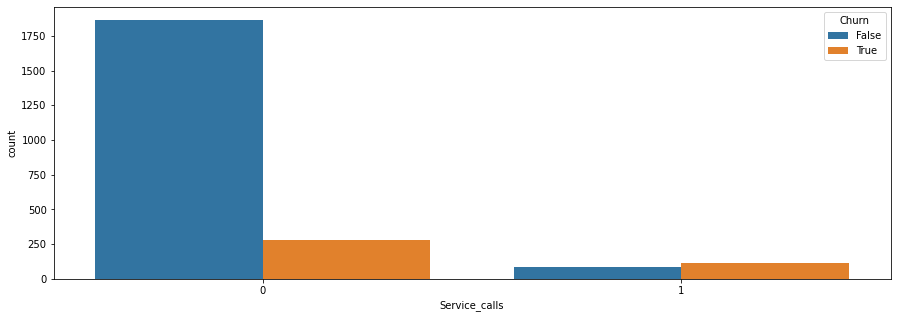

In [ ]:
sns.countplot(x = 'Service_calls', hue = 'Churn', data = new_df)


* Churn rate increases sharply from four customer service call and above

## Number of Voice mail messages affecting Churn

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


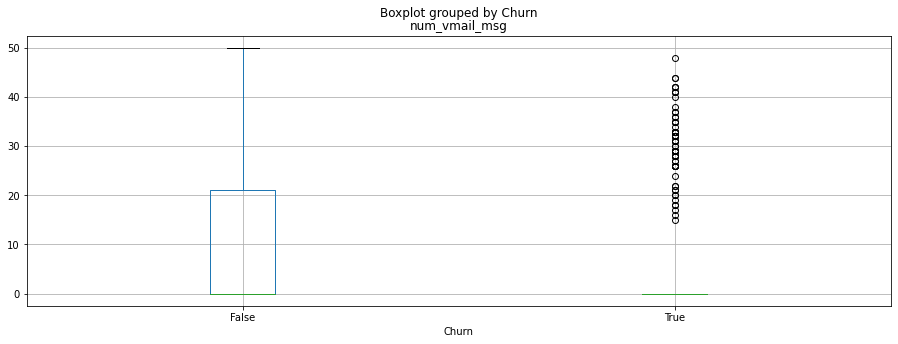

In [ ]:
new_df.boxplot(column='num_vmail_msg', by='Churn',figsize=(15,5))


* when there are more than 25 voice-mail messages then we get a chunk of people  indicating churn .Improving the voice-mail feature or setting a limit can improve the stats.
1. Voice-Mail Service Upgradation
2. Setting up a limit on Voice-Mail . 
3. Performance drop in  Voice-Mail after 25 voice mails.





Text(0.5, 1.0, 'Histogram plot for number of voice mails')

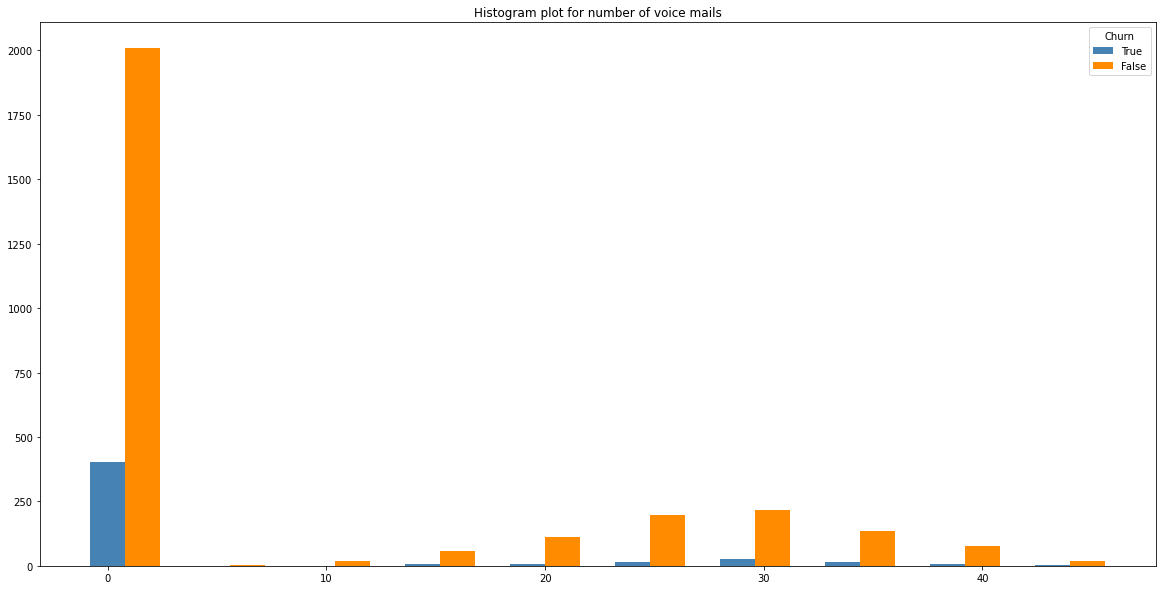

In [ ]:

fig, ax = plt.subplots(figsize=(20,10))

a_heights, a_bins = np.histogram(tele_df1[tele_df1['Churn']==True]['num_vmail_msg'])
b_heights, b_bins = np.histogram(tele_df1[tele_df1['Churn']==False]['num_vmail_msg'], bins=a_bins)

width = (a_bins[1] - a_bins[0])/3
ax.bar(a_bins[:-1], a_heights, width=width, facecolor='steelblue')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='darkorange')
ax.legend(labels=['True','False'],title='Churn')
plt.title('Histogram plot for number of voice mails')


## Call Duration Effect on Churning

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb31b3e7a10>,
      dtype=object)

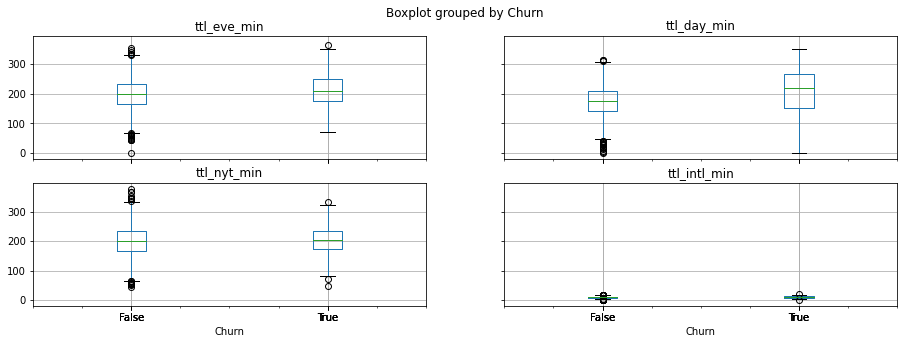

In [ ]:
new_df.boxplot(column=['ttl_eve_min','ttl_day_min','ttl_nyt_min','ttl_intl_min'], by='Churn')

Text(0.5, 1.0, 'Total night minutes')

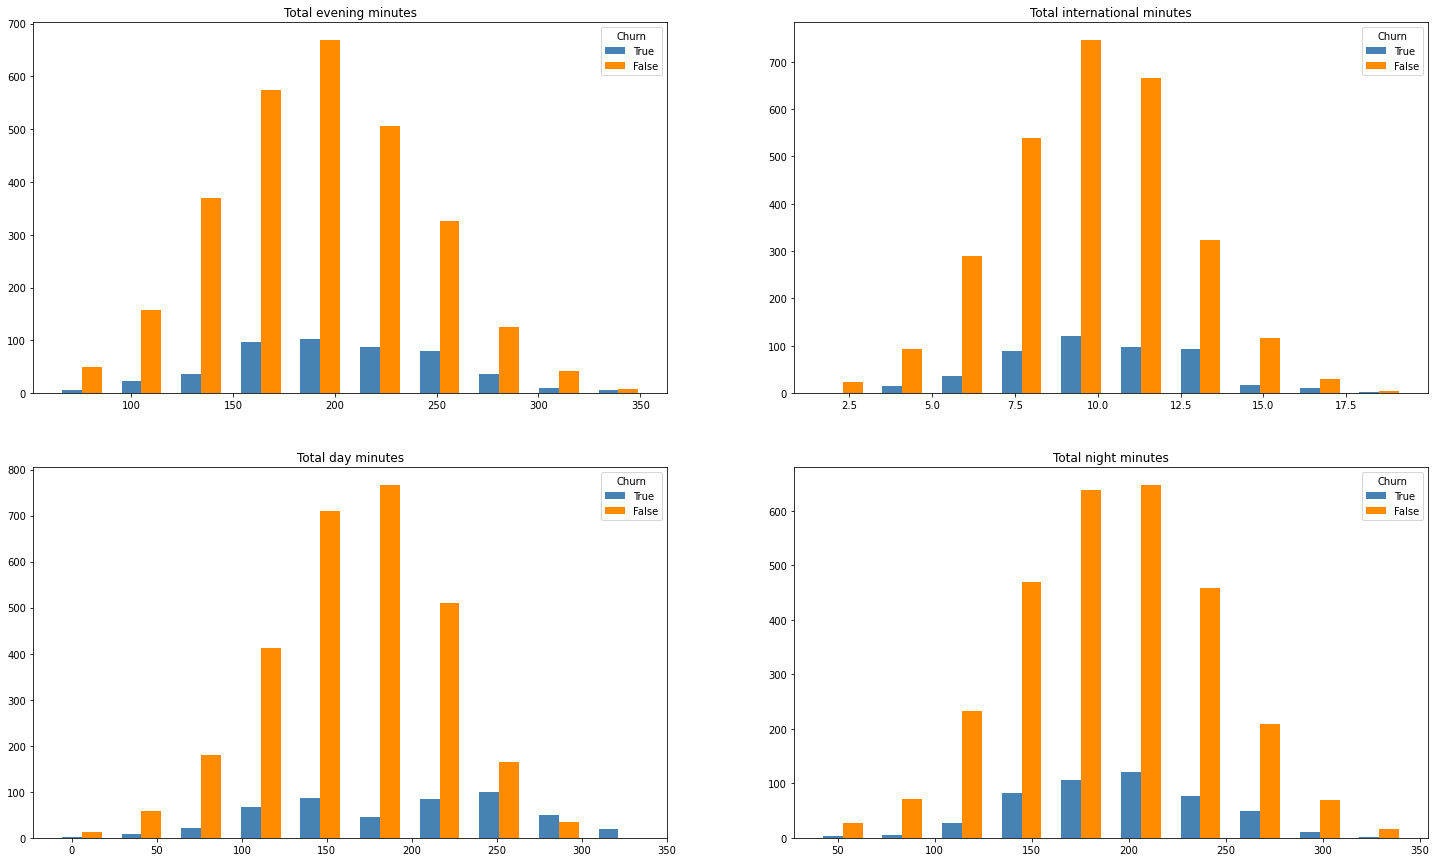

In [ ]:

fig, ax = plt.subplots(2,2,figsize=(25,15))

a_heights, a_bins = np.histogram(tele_df1[tele_df1['Churn']==True]['ttl_eve_min'])
b_heights, b_bins = np.histogram(tele_df1[tele_df1['Churn']==False]['ttl_eve_min'], bins=a_bins)


width = (a_bins[1] - a_bins[0])/3
ax[0,0].bar(a_bins[:-1], a_heights, width=width, facecolor='steelblue')
ax[0,0].bar(b_bins[:-1]+width, b_heights, width=width, facecolor='darkorange')
ax[0,0].legend(labels=['True','False'],title='Churn')
ax[0,0].set_title('Total evening minutes')

a_heights, a_bins = np.histogram(tele_df1[tele_df1['Churn']==True]['ttl_intl_min'])
b_heights, b_bins = np.histogram(tele_df1[tele_df1['Churn']==False]['ttl_intl_min'], bins=a_bins)


width = (a_bins[1] - a_bins[0])/3
ax[0,1].bar(a_bins[:-1], a_heights, width=width, facecolor='steelblue')
ax[0,1].bar(b_bins[:-1]+width, b_heights, width=width, facecolor='darkorange')
ax[0,1].legend(labels=['True','False'],title='Churn')
ax[0,1].set_title('Total international minutes')


a_heights, a_bins = np.histogram(tele_df1[tele_df1['Churn']==True]['ttl_day_min'])
b_heights, b_bins = np.histogram(tele_df1[tele_df1['Churn']==False]['ttl_day_min'], bins=a_bins)


width = (a_bins[1] - a_bins[0])/3
ax[1,0].bar(a_bins[:-1], a_heights, width=width, facecolor='steelblue')
ax[1,0].bar(b_bins[:-1]+width, b_heights, width=width, facecolor='darkorange')
ax[1,0].legend(labels=['True','False'],title='Churn')
ax[1,0].set_title('Total day minutes')

a_heights, a_bins = np.histogram(tele_df1[tele_df1['Churn']==True]['ttl_nyt_min'])
b_heights, b_bins = np.histogram(tele_df1[tele_df1['Churn']==False]['ttl_nyt_min'], bins=a_bins)


width = (a_bins[1] - a_bins[0])/3
ax[1,1].bar(a_bins[:-1], a_heights, width=width, facecolor='steelblue')
ax[1,1].bar(b_bins[:-1]+width, b_heights, width=width, facecolor='darkorange')
ax[1,1].legend(labels=['True','False'],title='Churn')
ax[1,1].set_title('Total night minutes')

* Above plot represents customer making call during day time for long duration are more prone to churn.

  We can infer from above day-night box-plot that with users spending more 210 minutes or more are switching to other operator.
Problems(on basis of assumption)  :
1. Network Disturbance during a Call
2. Noise during a call
Solution:
1. Need to Upgrade the service to improve Voice Quality.
2. Network Upgradation


## Number of call Effect on Churn

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03fa211ed0>,
      dtype=object)

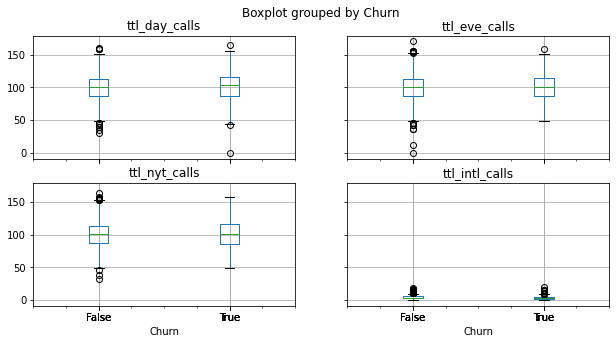

In [ ]:
new_df.boxplot(column=['ttl_day_calls','ttl_eve_calls','ttl_nyt_calls','ttl_intl_calls'], by='Churn')

* we can obseve that for the churn customer the median is slightly higher 
than 100 which indicates there are call drops which may lead to more calls .


In [ ]:

# fig, ax = plt.subplots()

# a_heights, a_bins = np.histogram(tele_df[tele_df['Churn']==True]['acc_length'])
# b_heights, b_bins = np.histogram(tele_df[tele_df['Churn']==False]['acc_length'], bins=a_bins)

# width = (a_bins[1] - a_bins[0])/3

# ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue')
# ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')
# plt.title('Histogram plot for account length')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03f9cb9a10>,
      dtype=object)

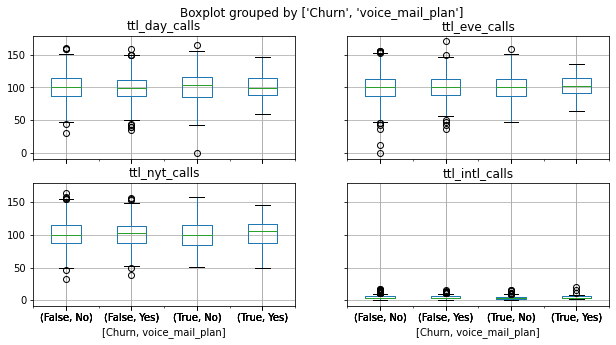

In [ ]:
new_df.boxplot(column=['ttl_day_calls','ttl_eve_calls','ttl_nyt_calls','ttl_intl_calls'], by=['Churn','voice_mail_plan'])

Day Time-
  * Churning Customer without voice mail plan  making more day calls .

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


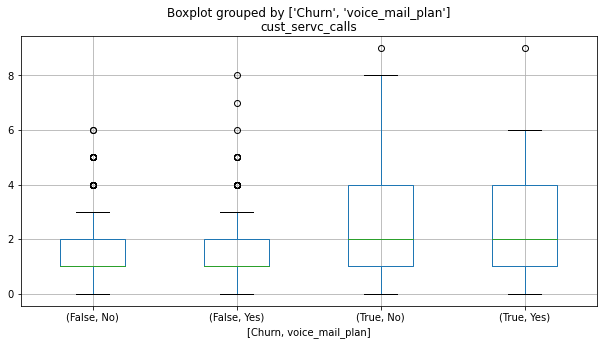

In [ ]:
new_df.boxplot(column=['cust_servc_calls'], by=['Churn','voice_mail_plan'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f03f9482450>,
      dtype=object)

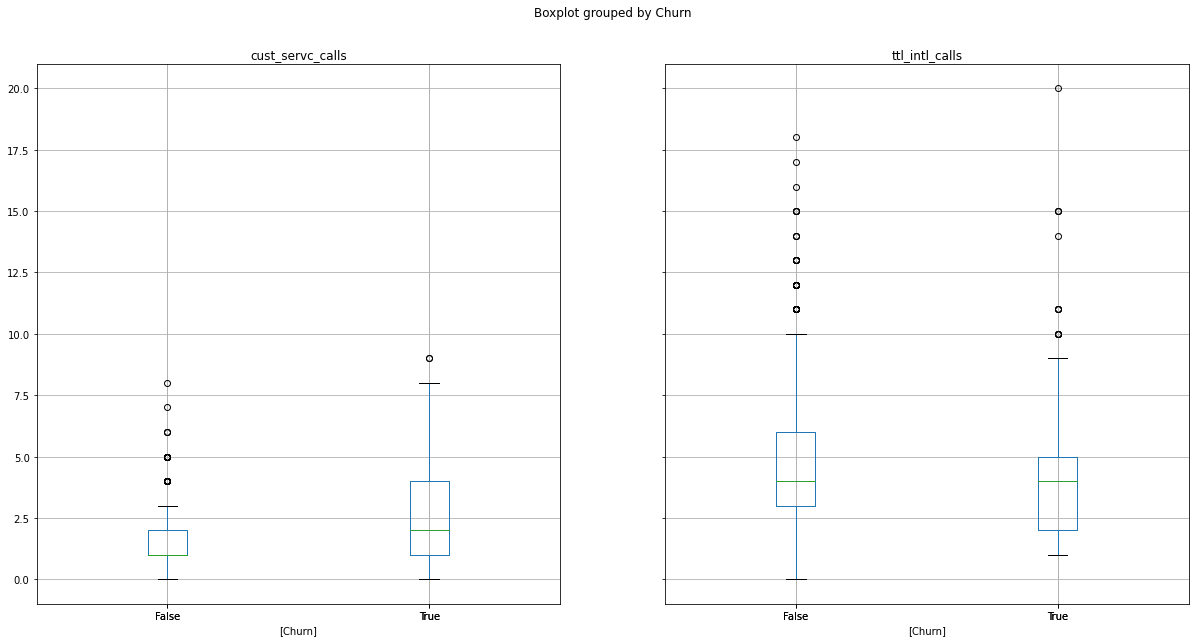

In [ ]:
new_df.boxplot(column=['cust_servc_calls','ttl_intl_calls'], by=['Churn','intl_plan'])

Churners with no international plan are  making more customer service calls.


In [ ]:
df6 = new_df.groupby(['Churn','intl_plan'])['intl_plan'].count()
df6.unstack()

# people having intl plan with false churning:

percent_false_intl = (df6.loc[False,'Yes']/df6.loc[False].sum())*100
print('The % of customers with false churning having intl plan is', round(percent_false_intl,2),'%')

# people having intl plan with true churning:

percent_true_intl  = (df6.loc[True,'Yes']/df6.loc[True].sum())*100
print('The % of customers with true churning having intl plan is',round(percent_true_intl,2),'%')

df6.unstack()


The % of customers with false churning having intl plan is 6.21 %
The % of customers with true churning having intl plan is 29.62 %


intl_plan    No  Yes
Churn               
False      1826  121
True        278  117

Text(0, 0.5, 'International plan')

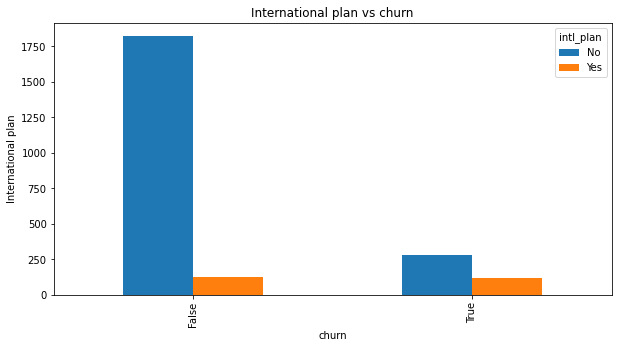

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
df6.unstack().plot(kind='bar')
plt.title('International plan vs churn')
plt.xlabel('churn')
plt.ylabel('International plan')


***The % of customers with false churning having intl plan is 6.21 % ***

***The % of customers with true churning having intl plan is 29.62 % ***

***OBSERVATIONS***

1.   85.5% percent of the total customers from the data set are loyal and 14.5% of them are in the churners list.
2.   35 top states that are contributing to 83% of the churners list.
3.   The churn rate by area code does not differ from the overall.
4.   Customers with the International Plan tend to churn more frequently.
5.   Customers with the Voice Mail Plan tend to churn less frequently.
6.   Customers with four or more customer service calls churn.

***RECOMMENDATIONS***

Based on the above observations, the following proposals are made that could reduce customer churn:
1.   Any strategy to alleviate churn must focus more on states having above-average churn.
2.   Survey all the customers whose call minutes and charges are above average to check for churn intent. Identify root causes for churning and take proper decisions to mitigate those concerns.
3.   Survey International plan customers to understand the problems and identify root causes for churn. Then take steps to curtail those causes.
4.   Escalate all calls beyond the 2nd customer call to ensure that any issues that the customer faces are fixed before the next call. Proactively check on customers to confirm that their issue is fixed.
